In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Datasets/Kitap1.csv")

In [380]:
df.head()

,player_id,player_name,season_date,team_name,played_match,team_played_match,minutes_played,goals,xG,assists,...,aerials_won,defansive_actions,touches,dribbles_attempted,successful_dribble_attempts,chances_created,all_passes,successful_passes,key_pass,offsides
0,1,Mauro Icardi,2023/2024,Galatasaray,34,38,2856,25,21.23,8,...,101,31,758,15,3,10,444,333,44,19
1,2,Edin Dzeko,2023/2024,Fenerbahce,36,38,2736,21,21.64,3,...,118,54,1158,45,18,10,711,498,30,18
2,3,Rey Manaj,2023/2024,EMS Yapi Sivasspor,32,38,2432,18,14.34,3,...,51,38,861,38,23,0,251,143,0,0


In [381]:
#minutes per goal
df["minutes_per_goal"] = round(df.minutes_played / df.goals, 2)
#the ratio of shots taken to goals scored
df["shot_goal_ratio"] = round(df.goals / df.shots * 100,2)

df.loc[:,["player_name","played_match","goals","xG","minutes_per_goal","shots","shot_goal_ratio"]]

,player_name,played_match,goals,xG,minutes_per_goal,shots,shot_goal_ratio
0,Mauro Icardi,34,25,21.23,114.24,104,24.04
1,Edin Dzeko,36,21,21.64,130.29,124,16.94
2,Rey Manaj,32,18,14.34,135.11,89,20.22


In [382]:
#At what rate does he make successful passes?
df["accurate_pass_rate"] = round(df.successful_passes / df.all_passes * 100, 2)

#When he touches the ball, what is his pass completion rate?
df["touches_after_complt_pass_rate"] = round(df.all_passes / df.touches * 100,2)

#accrucate key pass rate?
df["accrucate_keypass_rate"] = round(df.key_pass/df.successful_passes * 100,2)

df.loc[:,["player_name","touches","all_passes","successful_passes","accurate_pass_rate","touches_after_complt_pass_rate","accrucate_keypass_rate"]]

,player_name,touches,all_passes,successful_passes,accurate_pass_rate,touches_after_complt_pass_rate,accrucate_keypass_rate
0,Mauro Icardi,758,444,333,75.00,58.58,13.21
1,Edin Dzeko,1158,711,498,70.04,61.40,6.02
2,Rey Manaj,861,251,143,56.97,29.15,0.00


In [383]:
#We have seen that while Rey Manaj is a classic number 9, Edin Dzeko and Mauro Icardi can also play as target men.
#Icardi can make more key passes than his rivals. Although Dzeko helps to set up the game by touching or passing the ball more than his opponents, Icardi has a similar performance to him. And he scored more goals. 

In [437]:
#maç başına hava topu kazanımı
df["aerialswon_per_match"] = round(df.aerials_won / df.played_match, 2)
df.loc[:,["player_name","aerials_won","aerialswon_per_match"]]

,player_name,aerials_won,aerialswon_per_match
0,Mauro Icardi,101,2.97
1,Edin Dzeko,118,3.28
2,Rey Manaj,51,1.59


In [386]:
#maç başına şut
df["shots_per_match"] = round(df.shots / df.played_match, 2)
df.loc[:,["player_name","shots","shots_per_match"]]

,player_name,shots,shots_per_match
0,Mauro Icardi,104,3.06
1,Edin Dzeko,124,3.44
2,Rey Manaj,89,2.78


In [464]:
df.dtypes

player_id                            int64
player_name                       category
season_date                       category
team_name                         category
played_match                         int64
team_played_match                    int64
minutes_played                       int64
goals                                int64
xG                                 float64
assists                              int64
xA                                 float64
shots                                int64
aerials_won                          int64
defansive_actions                    int64
touches                              int64
dribbles_attempted                   int64
successful_dribble_attempts          int64
chances_created                      int64
all_passes                           int64
successful_passes                    int64
key_pass                             int64
offsides                             int64
minutes_per_goal                   float64
shot_goal_r

In [441]:
df.player_name = pd.Categorical(df.player_name)
df.season_date = pd.Categorical(df.season_date)
df.team_name = pd.Categorical(df.team_name)

In [443]:
#We categorized the objects

In [445]:
#the Radar Charts - Polar Histograms

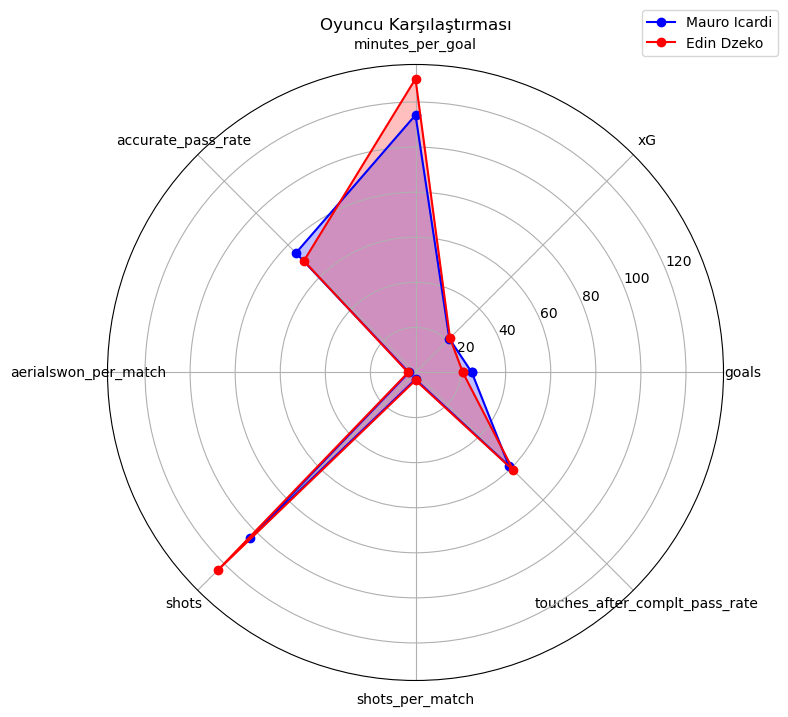

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cols = [ "goals", "xG", "minutes_per_goal", "accurate_pass_rate", "aerialswon_per_match","shots", "shots_per_match","touches_after_complt_pass_rate"]


# 360 dereceyi uygun şekilde böl
angles = np.linspace(0, 2*np.pi, len(cols), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # İlk açıyla son açıyı birleştir

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# İlk oyuncunun verilerini alalım ve çizeleim
data_1 = df.loc[0, cols].values
name_1 = df.loc[0, "player_name"]
stats_1 = np.concatenate((data_1, [data_1[0]]))  # İlk veriyle son veriyi birleştir
ax.plot(angles, stats_1, "o-", label=name_1, color='blue')
ax.fill(angles, stats_1, alpha=0.25, color='blue')

# İkinci oyuncunun verilerini alalım ve çizeleim
data_2 = df.loc[1, cols].values
name_2 = df.loc[1, "player_name"]
stats_2 = np.concatenate((data_2, [data_2[0]]))  # İlk veriyle son veriyi birleştir
ax.plot(angles, stats_2, "o-", label=name_2, color='red')
ax.fill(angles, stats_2, alpha=0.25, color='red')

# Etiketleri ekle
ax.set_thetagrids(angles[:-1] * 180/np.pi, cols)

# Başlık ve gösterge ekle
plt.title("Oyuncu Karşılaştırması")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

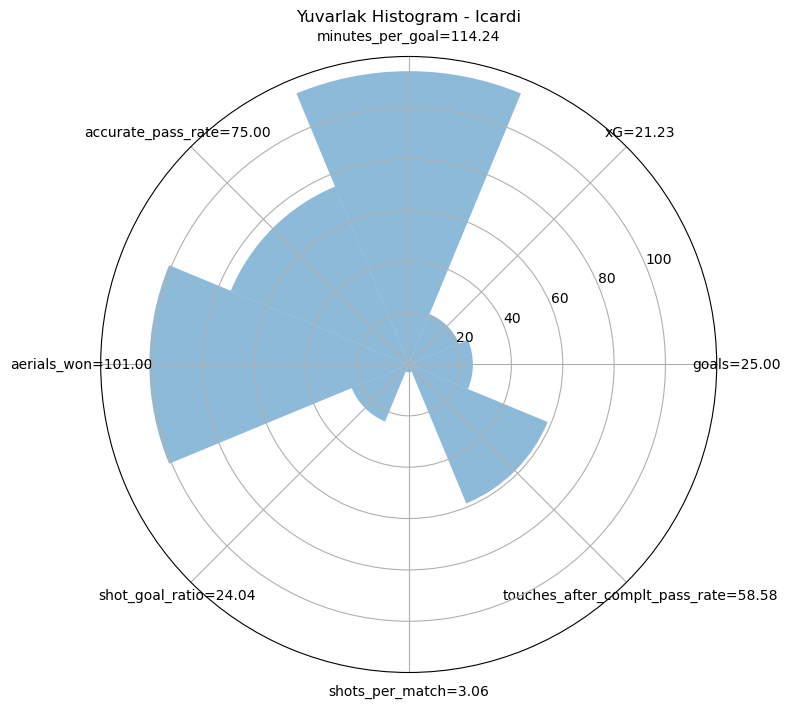

In [448]:

cols = ["goals", "xG", "minutes_per_goal", "accurate_pass_rate", "aerials_won", "shot_goal_ratio", "shots_per_match", "touches_after_complt_pass_rate"]

# Veri seçimi
player_index = 0  # İstediğiniz oyuncunun indexini buradan değiştirebilirsiniz
values = df.loc[player_index, cols].values

# 360 dereceyi uygun şekilde böl
angles = np.linspace(0, 2 * np.pi, len(cols), endpoint=False).tolist()

# Yuvarlak histogram
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Çubuk genişliği
width = 2 * np.pi / len(cols)

# Her bir çubuğu çizin
bars = ax.bar(angles, values, width=width, bottom=0.0, alpha=0.5)

# Etiketleri ekle ve yanlarına eşittir işareti ile değerleri yaz
labels = [f'{col}={value:.2f}' for col, value in zip(cols, values)]
ax.set_thetagrids(np.degrees(angles), labels)

# Başlık ekle
plt.title("Yuvarlak Histogram - Icardi")

plt.show()


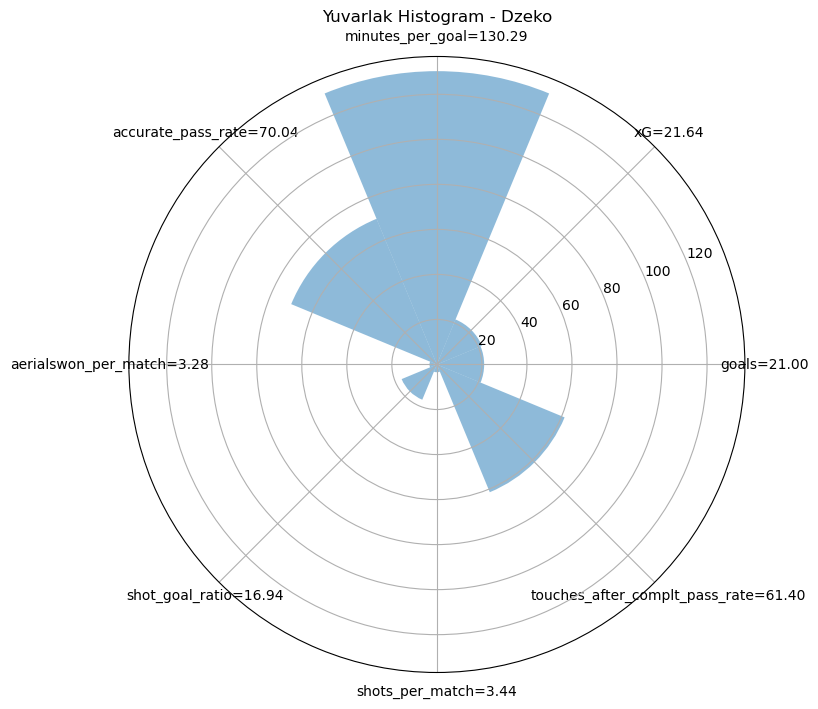

In [450]:
cols = ["goals", "xG", "minutes_per_goal", "accurate_pass_rate", "aerialswon_per_match", "shot_goal_ratio", "shots_per_match", "touches_after_complt_pass_rate"]

# Veri seçimi
player_index = 1  # İstediğiniz oyuncunun indexini buradan değiştirebilirsiniz
values = df.loc[player_index, cols].values

# 360 dereceyi uygun şekilde böl
angles = np.linspace(0, 2 * np.pi, len(cols), endpoint=False).tolist()

# Yuvarlak histogram
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Çubuk genişliği
width = 2 * np.pi / len(cols)

# Her bir çubuğu çizin
bars = ax.bar(angles, values, width=width, bottom=0.0, alpha=0.5)

# Etiketleri ekle ve yanlarına eşittir işareti ile değerleri yaz
labels = [f'{col}={value:.2f}' for col, value in zip(cols, values)]
ax.set_thetagrids(np.degrees(angles), labels)

# Başlık ekle
plt.title("Yuvarlak Histogram - Dzeko")

plt.show()

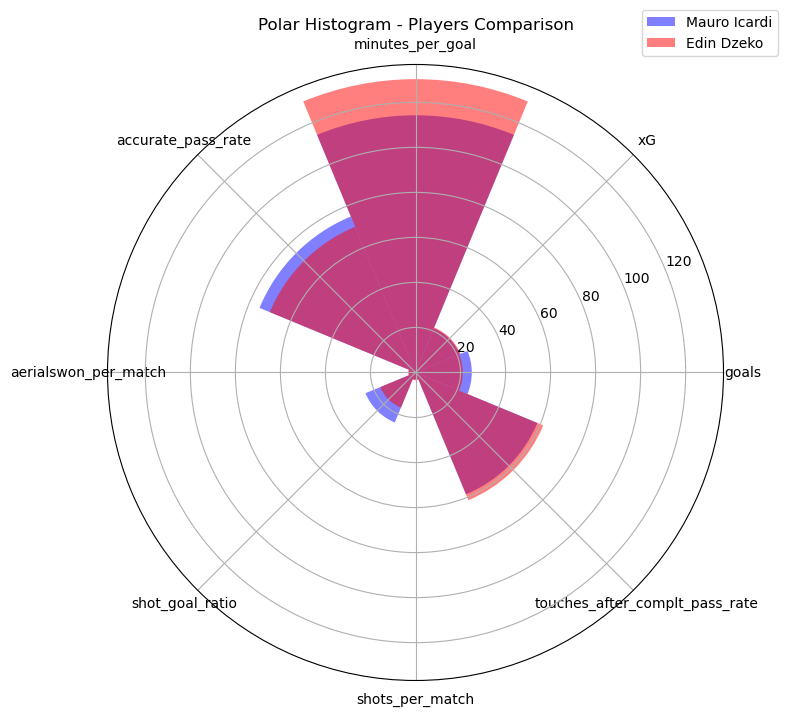

In [451]:

cols = ["goals", "xG","minutes_per_goal", "accurate_pass_rate", "aerialswon_per_match", "shot_goal_ratio", "shots_per_match", "touches_after_complt_pass_rate"]

# Select data for players
values_player1 = df.loc[0, cols].values
values_player2 = df.loc[1, cols].values

# Divide 360 degrees into equal parts
angles = np.linspace(0, 2 * np.pi, len(cols), endpoint=False).tolist()
angles += angles[:1]  # Repeat the first angle to close the circle

# Repeat the first value to close the circle for values
values_player1 = np.concatenate((values_player1, [values_player1[0]]))
values_player2 = np.concatenate((values_player2, [values_player2[0]]))

# Polar histogram
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Width of each bar
width = 2 * np.pi / len(cols)

# Draw each bar for player 1
bars1 = ax.bar(angles[:-1], values_player1[:-1], width=width, bottom=0.0, alpha=0.5, label=df.loc[0, "player_name"], color='blue')

# Draw each bar for player 2
bars2 = ax.bar(angles[:-1], values_player2[:-1], width=width, bottom=0.0, alpha=0.5, label=df.loc[1, "player_name"], color='red')

# Add labels with values next to each bar
labels = [f'{col}' for col in cols]
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Add title and legend
plt.title("Polar Histogram - Players Comparison")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


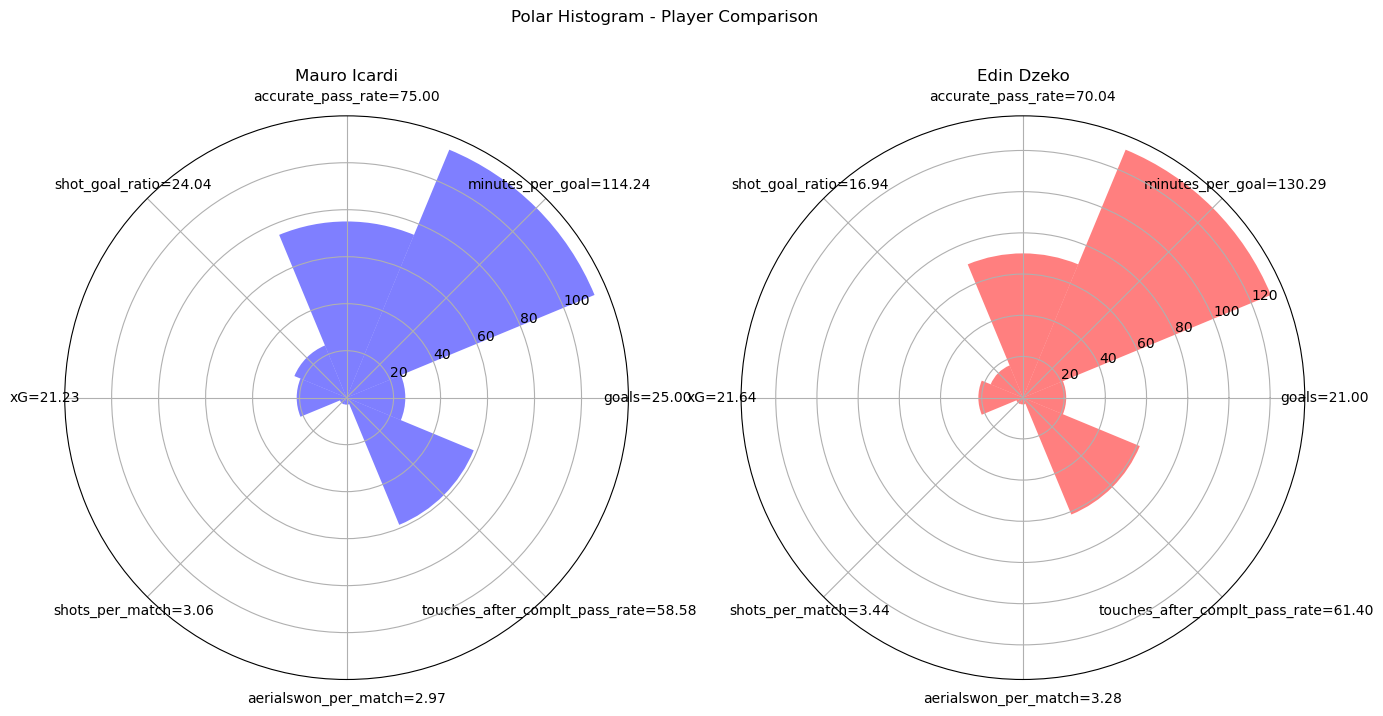

In [454]:


cols = ["goals", "minutes_per_goal", "accurate_pass_rate","shot_goal_ratio", "xG",  "shots_per_match","aerialswon_per_match", "touches_after_complt_pass_rate"]

# Select data for players
values_player0 = df.loc[0, cols].values
values_player1 = df.loc[1, cols].values

# Divide 360 degrees into equal parts
angles = np.linspace(0, 2 * np.pi, len(cols), endpoint=False).tolist()
angles += angles[:1]  # Repeat the first angle to close the circle

# Repeat the first value to close the circle for values
values_player0 = np.concatenate((values_player0, [values_player0[0]]))
values_player1 = np.concatenate((values_player1, [values_player1[0]]))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(polar=True))

# Width of each bar
width = 2 * np.pi / len(cols)

# Plot for player 0
ax1.bar(angles[:-1], values_player0[:-1], width=width, bottom=0.0, alpha=0.5, color='blue')
ax1.set_title(df.loc[0, "player_name"])
ax1.set_thetagrids(np.degrees(angles[:-1]), labels=[f'{col}={value:.2f}' for col, value in zip(cols, values_player0[:-1])])

# Plot for player 1
ax2.bar(angles[:-1], values_player1[:-1], width=width, bottom=0.0, alpha=0.5, color='red')
ax2.set_title(df.loc[1, "player_name"])
ax2.set_thetagrids(np.degrees(angles[:-1]), labels=[f'{col}={value:.2f}' for col, value in zip(cols, values_player1[:-1])])

# Set main title
plt.suptitle("Polar Histogram - Player Comparison")

plt.show()
